# Building a model of oxidative ATP synthesis from energetic components 

Simulations in the preceding section illustrate how matrix ATP and ADP concentrations are governed by the contributors to the proton motive force. They also show how the matrix ATP/ADP ratio must typically be less than $1$, in contrast to the cytosolic ATP/ADP ratio, which is on the order of $100$. To understand the dependence of ATP synthesis and transport on the proton motive force, the kinetics of the processes that generate it, and the interplay of these processes, we can assemble models of the adenine nucleotide translocase (ANT), mitochondrial phosphate transport, and complexes I, III, and IV of the electron transport chain (ETC) to generate a core model of mitochondrial oxidative ATP synthesis. 

## Adenine nucleotide translocase

Following synthesis of ATP from ADP and Pi in the matrix, the final step in delivering ATP to the cytosol at physiological free energy levels is the electrically driven exchange of a matrix $\text{ATP}^{4-}$ for a cytosolic $\text{ADP}^{3-}$. This exchange process,
```{math} 
	(\text{ATP}^{4-})_x + (\text{ADP}^{3-})_c \rightleftharpoons (\text{ATP}^{4-})_c + (\text{ADP}^{3-})_x \, ,
```
is catalyzed by the ANT. Here, we assume rapid transport of species between the cytosol and the IMS, and therefore, equate IMS and cytosol species concentrations.

To simulate the kinetics of this process, we use the Metelkin et al. model {cite}`Metelkin2006`, which accounts for pH and electrochemical dependencies. (Kinetic parameter value estimates for this model were updated by Wu et al. {cite}`Wu2008`.) The steady-state flux of ANT is expressed 
```{math}
	J_{\text{ANT}} = E_{\text{ANT}}  \dfrac{  \dfrac{ k_2^{\text{ANT}} q }{ K_o^D }  [ \text{ATP}^{4-} ]_x [ \text{ADP}^{3-}]_c  - \dfrac{ k_3^{\text{ANT}} }{ K_o^T } [ \text{ADP}^{3-} ]_x [ \text{ATP}^{4-} ]_c }{ \left(1 + \dfrac{ [ \text{ATP}^{4-} ]_c }{ K_o^T } + \dfrac{ [ \text{ADP}^{3-} ]_c }{ K_o^D } \right)( [ \text{ADP}^{3-} ]_x + [ \text{ATP}^{4-} ]_x q) }, 
```
where $E_{\text{ANT}} \ \text{(mol (L mito)}^{-1})$ is the total ANT content of the mitochondria and 
```{math} 
:label: phi
	k_2^\text{ANT} &=& k_{2,o}^\text{ANT} e^{( -3A - 4B + C) \phi}, \nonumber \\ 
	k_3^\text{ANT} &=& k_{3,o}^\text{ANT} e^{(-4A - 3B + C) \phi}, \nonumber \\ 
	K_o^D &=& K_o^{D,0} e^{3 \delta_D \phi}, \nonumber \\
	K_o^T &=& K_o^{T,0} e^{4 \delta_T \phi}, \nonumber \\ 
	q &=& \dfrac{ k_3^\text{ANT} K_o^D }{ k_2^\text{ANT} K_o^T } e^\phi, \quad \text{and} \nonumber \\
	\phi &=& F \Delta \Psi / R{\rm T}.  
``` 
All parameter values and units can be found in {numref}`table-ANT`, reproduced from {cite}`Bazil2016`. 

```{list-table} Adenine nucleotide translocase (ANT) parameters. 
:header-rows: 1
:name: table-ANT

* - Parameter 
  - Units 
  - Description 
  - Value
* - $E_\text{ANT}$ 
  - mol (L mito)$^{-1}$ 
  - ANT activity 
  - $0.325$
* - $\delta_D$ 
  - 
  - ADP displacement binding constant 
  - $0.0167 $
* - $\delta_T$ 
  - 
  - ATP displacement binding constant 
  - $0.0699 $
* - $k_{2,o}^\text{ANT}$ 
  - s$^{-1}$ 
  - Forward translocation rate 
  - $0.159 $
* - $k_{3,o}^\text{ANT}$ 
  - s$^{-1}$ 
  -  Reverse translocation rate 
  - $0.501 $
* - $K_o^{D,0}$ 
  - $\mu$mol (L cyto water)$^{-1}$ 
  - ADP binding constant 
  - $38.89 $
* - $K_o^{T,0}$ 
  - $\mu$mol (L cyto water)$^{-1}$ 
  - ATP binding constant 
  - $56.05$  
* - $A$ 
  - 
  - Translocation displacement constant 
  - $0.2829 $
* - $B$ 
  - 
  - Translocation displacement constant 
  - $ -0.2086 $ 
* - $C$ 
  - 
  - Translocation displacement constant 
  - $0.2372$  
```            

To simulate ANT and F$_0$F$_1$ ATP synthase activity simultaneously, we extend the system of Equation {eq}`system-ATPase` by adding states for cytosolic species $[\Sigma \text{ATP} ]_c$ and $[\Sigma \text{ADP}]_c$, yielding 
```{math}
:label: system-ATP_ANT
	\left\{ 
		\renewcommand{\arraystretch}{2} 
		\begin{array}{rlrl}
			\dfrac{ {\rm d} [\Sigma \text{ATP}]_x }{{\rm d} t} &= (J_\text{F} - J_\text{ANT} ) / W_x, & \dfrac{ {\rm d} [\Sigma \text{ATP}]_c }{{\rm d} t} &= (V_{m2c} J_\text{ANT})  / W_c, \\
			\dfrac{ {\rm d} [\Sigma \text{ADP}]_x }{{\rm d} t} &= (-J_\text{F} + J_\text{ANT}) / W_x, & \dfrac{ {\rm d} [\Sigma \text{ADP}]_c }{{\rm d} t} &= (-V_{m2c} J_\text{ANT}) / W_c, \\ 
			\dfrac{ {\rm d} [\Sigma \text{Pi}]_x }{{\rm d} t} &= 0 & &\\
		\end{array}
		\renewcommand{\arraystretch}{1} 
	\right.
```
where $V_{m2c} \ \text{(L mito) (L cyto)}^{-1}$ is the fraction of the volume of mitochondria per volume cytosol and $W_c \ \text{(L cyto water) (L cyto)}^{-1}$ is the fraction of water volume in the cytoplasm to the total volume of the cytoplasm ({numref}`table-biophysicalconstants`). 

Here, we clamp the matrix phosphate concentration at a constant value since the equation {eq}`system-ATP_ANT` does not account for phosphate transport between the matrix and the cytosol.  

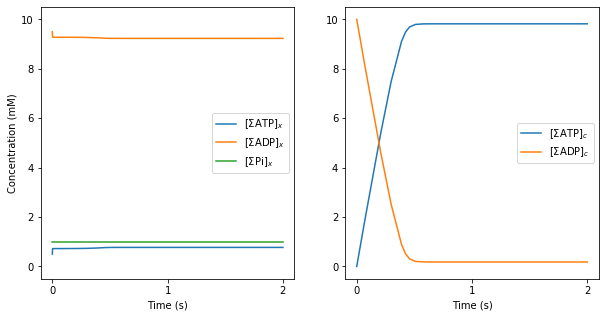

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

###### Constants defining metabolite pools ######
# Volume fractions and water space fractions
V_c = 0.6601       # cytosol volume fraction       # L cyto (L cell)**(-1)
V_m = 0.2882       # mitochondrial volume fraction # L mito (L cell)**(-1)
V_m2c = V_m / V_c  # mito to cyto volume ratio     # L mito (L cuvette)**(-1)
W_c = 0.8425      # cytosol water space           # L cyto water (L cyto)**(-1)
W_m = 0.7238       # mitochondrial water space     # L mito water (L mito)**(-1)
W_x = 0.9*W_m      # matrix water space            # L matrix water (L mito)**(-1)
W_i = 0.1*W_m      # intermembrane water space     # L IM water (L mito)**(-1)

# Membrane capacitance
Cm   = 3.1e-3

# Membrane potential 
DPsi = 175/1000

###### Set fixed pH, cation concentrations, and O2 partial pressure ######
# pH
pH_x = 7.40
pH_c = 7.20

# K+ concentrations
K_x  = 100e-3     # mol (L matrix water)**(-1)
K_c  = 140e-3     # mol (L cyto water)**(-1)

# Mg2+ concentrations
Mg_x = 1.0e-3     # mol (L matrix water)**(-1)
Mg_c = 1.0e-3     # mol (L cyto water)**(-1)

# Oxygen partial pressure
PO2 = 25          # mmHg

###### Parameter vector ###### 
X_F   = 1000      # Synthase activity 
E_ANT = 0.325     # Nucleotide transporter activity 
activity_array = np.array([X_F, E_ANT])     # Note: This array will be larger in the future parts

###### Initial Conditions ######
# Matrix species
sumATP_x_0 = 0.5e-3  # mol (L matrix water)**(-1)
sumADP_x_0 = 9.5e-3  # mol (L matrix water)**(-1)
sumPi_x_0  = 1e-3  # mol (L matrix water)**(-1)

# Cytoplasmic species
sumATP_c_0 = 0 #9.95e-3        # mol (L cyto water)**(-1)
sumADP_c_0 = 10e-3 #0.05e-3        # mol (L cyto water)**(-1)

X_0 = np.array([sumATP_x_0, sumADP_x_0, sumPi_x_0, sumATP_c_0, sumADP_c_0])

def dXdt(t, X, activity_array):
    # Unpack variables 
    sumATP_x, sumADP_x, sumPi_x, sumATP_c, sumADP_c  = X
    X_F, E_ANT = activity_array

    # Hydrogen ion concentration
    H_x = 10**(-pH_x) # mol (L matrix water)**(-1)
    H_c = 10**(-pH_c) # mol (L cuvette water)**(-1)

    # Oxygen concentration
    a_3  = 1.74e-6   # oxygen solubility in cuvette   # mol (L matrix water * mmHg)**(-1)
    O2_x = a_3*PO2   # mol (L matrix water)**(-1)

    # Thermochemical constants
    R = 8.314          # J (mol K)**(-1)
    T = 37 + 273.15    # K
    F = 96485          # C mol**(-1)
    
    # Proton motive force parameters (dimensionless)
    n_F  = 8/3
    
    # Dissociation constants
    K_MgATP = 10**(-3.88)
    K_HATP  = 10**(-6.33)
    K_KATP  = 10**(-1.02)
    K_MgADP = 10**(-3.00)
    K_HADP  = 10**(-6.26)
    K_KADP  = 10**(-0.89)
    K_MgPi  = 10**(-1.66)
    K_HPi   = 10**(-6.62)
    K_KPi   = 10**(-0.42)

    ## Binding polynomials
    # Matrix species # mol (L mito water)**(-1)
    PATP_x = 1 + H_x/K_HATP + Mg_x/K_MgATP + K_x/K_KATP
    PADP_x = 1 + H_x/K_HADP + Mg_x/K_MgADP + K_x/K_KADP
    PPi_x  = 1 + H_x/K_HPi  + Mg_x/K_MgPi  + K_x/K_KPi
    
    # Cytosol species # mol (L cuvette water)**(-1)
    PATP_c = 1 + H_c/K_HATP + Mg_c/K_MgATP + K_c/K_KATP
    PADP_c = 1 + H_c/K_HADP + Mg_c/K_MgADP + K_c/K_KADP
    PPi_c  = 1 + H_c/K_HPi  + Mg_c/K_MgPi  + K_c/K_KPi
    
    ## Unbound species
    # Matrix species
    ATP_x = sumATP_x / PATP_x # [ATP4-]_x
    ADP_x = sumADP_x / PADP_x # [ADP3-]_x
    Pi_x  = sumPi_x  / PPi_x  # [HPO42-]_x
    
    # Cytosol species 
    ATP_c = sumATP_c / PATP_c # [ATP4-]_c
    ADP_c = sumADP_c / PADP_c # [ADP3-]_c

    ###### F0F1-ATPase ######
    # ADP3-_x + HPO42-_x + H+_x + n_A*H+_i <-> ATP4- + H2O + n_A*H+_x
    
    # Gibbs energy (J mol**(-1))
    DrGo_F   = 4990 
    DrGapp_F = DrGo_F + R * T * np.log( H_x * PATP_x / (PADP_x * PPi_x))
    
    # Apparent equilibrium constant 
    Kapp_F = np.exp( (DrGapp_F + n_F * F * DPsi ) / (R * T)) * (H_c / H_x)**n_F
    
    # Flux (mol (s * L mito)**(-1))
    J_F = X_F * (Kapp_F * sumADP_x * sumPi_x - sumATP_x)
    
    ###### ANT ######
    # ATP4-_x + ADP3-_i <-> ATP4-_i + ADP3-_x
    
    #Constants
    del_D   = 0.0167
    del_T   = 0.0699
    k2o_ANT = 9.54/60      # s**(-1)
    k3o_ANT = 30.05/60     # s**(-1)
    K0o_D   = 38.89e-6     # mol (L cuvette water)**(-1)
    K0o_T   = 56.05e-6     # mol (L cuvette water)**(-1)
    A       = +0.2829
    B       = -0.2086
    C       = +0.2372
    
    phi = F * DPsi / (R * T)
    
    # Reaction rates (s**(-1))
    k2_ANT = k2o_ANT * np.exp((A*(-3) + B*(-4) + C)*phi)
    k3_ANT = k3o_ANT * np.exp((A*(-4) + B*(-3) + C)*phi)
    
    # Dissociation constants (M)
    K0_D = K0o_D * np.exp(3*del_D*phi)
    K0_T = K0o_T * np.exp(4*del_T*phi)
    
    q     = k3_ANT * K0_D * np.exp(phi) / (k2_ANT * K0_T)
    term1 = k2_ANT * ATP_x * ADP_c * q / K0_D
    term2 = k3_ANT * ADP_x * ATP_c / K0_T
    num   = term1 - term2
    den   = (1 + ATP_c/K0_T + ADP_c/K0_D) * (ADP_x + ATP_x * q)
    
    # Flux (mol (s * L mito)**(-1))
    J_ANT = E_ANT * num / den

    ###### Differential equations (equation 14) ######
    # Matrix species
    dATP_x = (J_F  - J_ANT) / W_x
    dADP_x = (-J_F + J_ANT) / W_x
    dPi_x  = 0 #(-J_F ) / W_x

    # Cytosol species
    dATP_c = ( V_m2c * J_ANT) / W_c
    dADP_c = (-V_m2c * J_ANT) / W_c

    dX = [dATP_x, dADP_x, dPi_x, dATP_c, dADP_c]
    return dX

# Solve ODE
results = solve_ivp(dXdt, [0, 2], X_0, method = 'Radau', args=(activity_array,))
t = results.t
sumATP_x, sumADP_x, sumPi_x, sumATP_c, sumADP_c = results.y

# Plot figures 
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(t, sumATP_x*1000, label = '[$\Sigma$ATP]$_x$')
ax[0].plot(t, sumADP_x*1000, label = '[$\Sigma$ADP]$_x$')
ax[0].plot(t, sumPi_x*1000, label = '[$\Sigma$Pi]$_x$')
ax[0].legend(loc="right")
ax[0].set_ylim((-.5,10.5))
ax[0].set_xlabel('Time (s)')
ax[0].set_xticks([0,1,2])
ax[0].set_ylabel('Concentration (mM)')

ax[1].plot(t, sumATP_c*1000, label = '[$\Sigma$ATP]$_c$')
ax[1].plot(t, sumADP_c*1000, label = '[$\Sigma$ADP]$_c$')
ax[1].set_ylim((-0.5,10.5))
ax[1].set_xticks([0,1,2])
ax[1].legend(loc="right")
ax[1].set_xlabel('Time (s)')
plt.show()


The above simulations of the system of Equation {eq}`system-ATP_ANT` show how the electrogenic nature of the ANT transport results in markedly different ATP/ADP ratios in the cytosol compared to the matrix. As we saw in the previous chapter, the ATP hydrolysis potential in the matrix is approximately $\text{-}45 \ \text{kJ mol}^{-1}$. The roughly $50$:$1$ ratio of ATP to ADP in the cytosol is associated with a hydrolysis potential of approximately $\text{-}65 \ \text{kJ mol}^{-1}$. The difference of $20 \ \text{kJ mol}^{-1}$ between the matrix and the cytosolic space is driven primarily by the membrane potential, which is equivalent to $20 \ \text{kJ mol}^{-1}$.

## Inorganic phosphate transport

During active ATP synthesis, mitochondrial Pi is replenished via the activity of the phosphate-proton cotransporter (PiC), catalyzing the electroneutral cotransport of protonated inorganic phosphate, $\text{H}_2\text{PO}_4^{-}$, and $\text{H}^{+}$ across the membrane. Again, we assume rapid transport between the cytoplasm and intermembrane space, and hence, we have 
```{math}
    (\text{H}_2\text{PO}_4^{-})_x + (\text{H}^{+})_x \rightleftharpoons (\text{H}_2\text{PO}_4^{-})_c + (\text{H}^{+})_c.
```
Adopting the flux equation from Bazil et al. {cite}`Bazil2016`, we have
```{math}
    J_\text{PiC} = E_{\text{PiC}} \dfrac{ [\text{H}^{+} ]_{c} [\text{H}_2\text{PO}_4^{-}]_{c} - [\text{H}^{+}]_{x} [\text{H}_2\text{PO}_4^{-}]_{x} }{ [\text{H}_2\text{PO}_4^{-}]_c + k_{\text{PiC}} }, 
```
where $E_{\text{PiC}} \ \text{(L matrix water) s}^{-1} \text{ (L mito)}^{-1}$ is the PiC activity rate and $k_{\text{PiC}} = 1.61$ mM is an effective Michaelis-Menten constant. The $\text{H}_2\text{PO}_4^{-}$ concentrations in the matrix and cytosol are computed via the relationship
```{math}
    [\text{H}_2\text{PO}_4^{-}] = [\Sigma{\rm Pi}] \left( [{\rm H}^+]/K_{\rm HPi} \right) / P_{\rm Pi} . 
```

To incorporate PiC into Equation {eq}`system-ATP_ANT`, we add a new state $[\Sigma \text{Pi}]_c$ such that at given membrane potential, matrix and cytosolic pH, and cation concentrations, we obtain  
```{math}
:label: system-ATP_ANT_PiC
	\left\{ 
		\renewcommand{\arraystretch}{2} 
		\begin{array}{rlrl}
			\dfrac{ {\rm d} [\Sigma \text{ATP}]_x }{{\rm d} t} &= (J_\text{F} - J_\text{ANT} ) / W_x,  & \dfrac{ {\rm d} [\Sigma \text{ATP}]_c }{{\rm d} t} &= (V_{m2c} J_\text{ANT})  / W_c \\
			\dfrac{ {\rm d} [\Sigma \text{ADP}]_x }{{\rm d} t} &= (-J_\text{F} + J_\text{ANT}) / W_x, & \dfrac{ {\rm d} [\Sigma \text{ADP}]_c }{{\rm d} t} &= (-V_{m2c} J_\text{ANT}) / W_c, \\ 
			\dfrac{ {\rm d} [\Sigma \text{Pi}]_x }{{\rm d} t} &= (-J_\text{F} + J_\text{PiC}) / W_x, & \dfrac{ {\rm d} [\Sigma \text{Pi}]_c }{{\rm d} t} &= (- V_{m2c} J_\text{PiC}) / W_c,
		\end{array}
		\renewcommand{\arraystretch}{1} 
	\right.
```

The following code simulates the synthesis of ATP from ADP and Pi and their translocation across the IMM under physiological conditions.

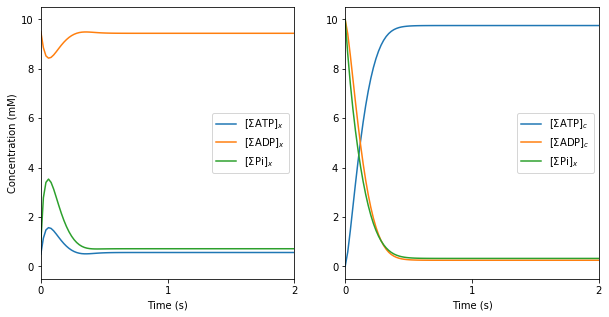

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

###### Constants defining metabolite pools ######
# Volume fractions and water space fractions
V_c = 0.6601       # cytosol volume fraction       # L cyto (L cell)**(-1)
V_m = 0.2882       # mitochondrial volume fraction # L mito (L cell)**(-1)
V_m2c = V_m / V_c  # mito to cyto volume ratio     # L mito (L cuvette)**(-1)
W_c = 0.8425      # cytosol water space           # L cyto water (L cyto)**(-1)
W_m = 0.7238       # mitochondrial water space     # L mito water (L mito)**(-1)
W_x = 0.9*W_m      # matrix water space            # L matrix water (L mito)**(-1)
W_i = 0.1*W_m      # intermembrane water space     # L IM water (L mito)**(-1)

# Membrane capacitance
Cm = 3.1e-3

# Membrane potential 
DPsi = 175/1000

###### Set fixed pH, cation concentrations, and O2 partial pressure ######
# pH
pH_x = 7.40
pH_c = 7.20

# K+ concentrations
K_x  = 100e-3      # mol (L matrix water)**(-1)
K_c  = 140e-3      # mol (L cyto water)**(-1)

# Mg2+ concentrations
Mg_x = 1.0e-3        # mol (L matrix water)**(-1)
Mg_c = 1.0e-3        # mol (L cyto water)**(-1)

# Oxygen partial pressure
PO2 = 25 # mmHg

###### Parameter vector ###### 
X_F   = 100        # Synthase activity 
E_ANT = 0.325      # Nucleotide transporter activity 
E_PiC = 5.0e6      # Phosphate transporter activity 

activity_array = np.array([X_F, E_ANT, E_PiC])     

###### Initial Conditions ######
# Matrix species
sumATP_x_0 = 0.5e-3  # mol (L matrix water)**(-1)
sumADP_x_0 = 9.5e-3  # mol (L matrix water)**(-1)
sumPi_x_0  = 1e-3  # mol (L matrix water)**(-1)

# Cytosolic species
sumATP_c_0 = 0       # mol (L cyto water)**(-1)
sumADP_c_0 = 10e-3   # mol (L cyto water)**(-1)
sumPi_c_0  = 10e-3   # mol (L cyto water)**(-1)

X_0 = np.array([sumATP_x_0, sumADP_x_0, sumPi_x_0, sumATP_c_0, sumADP_c_0, sumPi_c_0])

def dXdt(t, X, activity_array):
    # Unpack variables 
    sumATP_x, sumADP_x, sumPi_x, sumATP_c, sumADP_c, sumPi_c  = X
    X_F, E_ANT, E_PiC = activity_array

    # Hydrogen ion concentration
    H_x = 10**(-pH_x) # mol (L matrix water)**(-1)
    H_c = 10**(-pH_c) # mol (L cuvette water)**(-1)

    # Oxygen concentration
    a_3  = 1.74e-6   # oxygen solubility in cuvette   # mol (L matrix water * mmHg)**(-1)
    O2_x = a_3*PO2   # mol (L matrix water)**(-1)

    # Thermochemical constants
    R = 8.314          # J (mol K)**(-1)
    T = 37 + 273.15    # K
    F = 96485          # C mol**(-1)
    
    # Proton motive force parameters (dimensionless)
    n_F  = 8/3
    n_C1 = 4
    n_C3 = 2
    n_C4 = 4
    
    # Dissociation constants
    K_MgATP = 10**(-3.88)
    K_HATP  = 10**(-6.33)
    K_KATP  = 10**(-1.02)
    K_MgADP = 10**(-3.00)
    K_HADP  = 10**(-6.26)
    K_KADP  = 10**(-0.89)
    K_MgPi  = 10**(-1.66)
    K_HPi   = 10**(-6.62)
    K_KPi   = 10**(-0.42)

    ## Binding polynomials
    # Matrix species # mol (L mito water)**(-1)
    PATP_x = 1 + H_x/K_HATP + Mg_x/K_MgATP + K_x/K_KATP
    PADP_x = 1 + H_x/K_HADP + Mg_x/K_MgADP + K_x/K_KADP
    PPi_x  = 1 + H_x/K_HPi  + Mg_x/K_MgPi  + K_x/K_KPi
    
    # Cytosol species # mol (L cuvette water)**(-1)
    PATP_c = 1 + H_c/K_HATP + Mg_c/K_MgATP + K_c/K_KATP
    PADP_c = 1 + H_c/K_HADP + Mg_c/K_MgADP + K_c/K_KADP
    PPi_c  = 1 + H_c/K_HPi  + Mg_c/K_MgPi  + K_c/K_KPi
    
    ## Unbound species
    # Matrix species
    ATP_x = sumATP_x / PATP_x # [ATP4-]_x
    ADP_x = sumADP_x / PADP_x # [ADP3-]_x
    Pi_x  = sumPi_x  / PPi_x  # [HPO42-]_x
    
    # Cytosol species 
    ATP_c = sumATP_c / PATP_c # [ATP4-]_c
    ADP_c = sumADP_c / PADP_c # [ADP3-]_c
    Pi_c  = sumPi_c  / PPi_c  # [HPO42-]_c
    
    ###### H+-PI2 cotransporter ######
    # H2PO42-_x + H+_x = H2PO42-_c + H+_c
    
    # Constant
    k_PiC = 1.61e-3  # mol (L cuvette)**(-1)
    
    # H2P04- species
    HPi_c = Pi_c * (H_c / K_HPi)
    HPi_x = Pi_x * (H_x / K_HPi)
    
    # Flux (mol (s * L mito)**(-1))
    J_PiC = E_PiC * (H_c * HPi_c - H_x * HPi_x) / (k_PiC + HPi_c)

    ###### F0F1-ATPase ######
    # ADP3-_x + HPO42-_x + H+_x + n_A*H+_i <-> ATP4- + H2O + n_A*H+_x
    
    # Gibbs energy (J mol**(-1))
    DrGo_F = 4990 
    DrGapp_F = DrGo_F + R * T * np.log( H_x * PATP_x / (PADP_x * PPi_x))
    
    # Apparent equilibrium constant 
    Kapp_F   = np.exp( (DrGapp_F + n_F * F * DPsi ) / (R * T)) * (H_c / H_x)**n_F
    
    # Flux (mol (s * L mito)**(-1))
    J_F = X_F * (Kapp_F * sumADP_x * sumPi_x - sumATP_x)
    
    ###### ANT ######
    # ATP4-_x + ADP3-_i <-> ATP4-_i + ADP3-_x
    
    # Constants 
    del_D   = 0.0167
    del_T   = 0.0699
    k2o_ANT = 9.54/60      # s**(-1)
    k3o_ANT = 30.05/60     # s**(-1)
    K0o_D   = 38.89e-6     # mol (L cuvette water)**(-1)
    K0o_T   = 56.05e-6     # mol (L cuvette water)**(-1)
    A       = +0.2829
    B       = -0.2086
    C       = +0.2372
    
    phi = F * DPsi / (R * T)
    
    # Reaction rates (s**(-1))
    k2_ANT = k2o_ANT * np.exp((A*(-3) + B*(-4) + C)*phi)
    k3_ANT = k3o_ANT * np.exp((A*(-4) + B*(-3) + C)*phi)
    
    # Dissociation constants (M)
    K0_D = K0o_D * np.exp(3*del_D*phi)
    K0_T = K0o_T * np.exp(4*del_T*phi)
    
    q     = k3_ANT * K0_D * np.exp(phi) / (k2_ANT * K0_T)
    term1 = k2_ANT * ATP_x * ADP_c * q / K0_D
    term2 = k3_ANT * ADP_x * ATP_c / K0_T
    num   = term1 - term2
    den   = (1 + ATP_c/K0_T + ADP_c/K0_D) * (ADP_x + ATP_x * q)
    
    # Flux (mol (s * L mito)**(-1))
    J_ANT = E_ANT * num / den

    ###### Differential equations (equation 15) ######
    # Matrix species
    dATP_x  = (J_F  - J_ANT) / W_x
    dADP_x  = (-J_F + J_ANT) / W_x
    dPi_x   = (-J_F + J_PiC) / W_x

    # Buffer species
    dATP_c = ( V_m2c * J_ANT) / W_c
    dADP_c = (-V_m2c * J_ANT) / W_c
    dPi_c  = (-V_m2c * J_PiC) / W_c

    dX = [dATP_x, dADP_x, dPi_x, dATP_c, dADP_c, dPi_c]
    return dX

# Solve ODE
t = np.linspace(0,2,100)
results = solve_ivp(dXdt, [0, 2], X_0, method = 'Radau', t_eval = t, args=(activity_array,))
sumATP_x, sumADP_x, sumPi_x, sumATP_c, sumADP_c, sumPi_c = results.y

# Plot figures 
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(t, sumATP_x*1000, label = '[$\Sigma$ATP]$_x$')
ax[0].plot(t, sumADP_x*1000, label = '[$\Sigma$ADP]$_x$')
ax[0].plot(t, sumPi_x*1000, label = '[$\Sigma$Pi]$_x$')
ax[0].legend(loc="right")
ax[0].set_ylim((-.5,10.5))
ax[0].set_xlim((0,2))
ax[0].set_xticks([0,1,2])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Concentration (mM)')

ax[1].plot(t, sumATP_c*1000, label = '[$\Sigma$ATP]$_c$')
ax[1].plot(t, sumADP_c*1000, label = '[$\Sigma$ADP]$_c$')
ax[1].plot(t, sumPi_c*1000, label = '[$\Sigma$Pi]$_x$')
ax[1].set_ylim((-0.5,10.5))
ax[1].set_xlim((0,2))
ax[1].set_xticks([0,1,2])
ax[1].legend(loc="right")
ax[1].set_xlabel('Time (s)')
plt.show()


For the above simulations, cytosolic inorganic phosphate is set to $10 \ \text{mM}$ initially, and all other initial conditions remain unchanged. Driven by $\Delta \text{pH}$, a gradient in phosphate concentration is established, with a steady-state ratio of matrix-to-cytosol concentration of approximately $2.2$. As seen in the previous section, with a constant membrane potential of $175 \ \text{mV}$, the ATP/ADP ratio is maintained at a much higher level in the cytosol than in the matrix. 

The final matrix and cytosol ATP and ADP concentrations depend not only on the membrane potential, but also on the total amount of exchangeable phosphate in the system. Here these simulations start with $[\text{Pi}]_c = 10 \ \text{mM}$ and $[\text{Pi}]_x = 1 \ \text{mM}$. The initial $10 \ \text{mM}$ of ADP in the cytosol becomes almost entirely phosphorylated to ATP, leaving $0.32 \ \text{mM}$ of inorganic phosphate in the cytosol in the final steady state. To explore how these steady states depend on $\Delta\Psi$, the following code simulates the steady-state behavior of this system for a range of $\Delta\Psi$ from $100$ to $200 \ \text{mV}$.

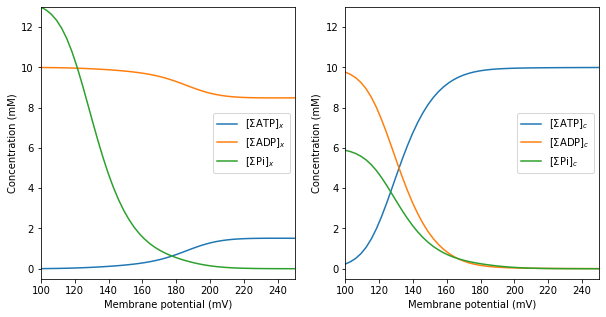

In [3]:
### Simulate over a range of Membrane potential from 100 mV to 250 mV ###

# Define array to iterate over
membrane_potential = np.linspace(100,250)    # mV

# Constant external pH
pH_c = 7.2 # IMS/buffer pH

# Define arrays to store steady state results 
ATP_x_steady = np.zeros(len(membrane_potential))
ADP_x_steady = np.zeros(len(membrane_potential))
Pi_x_steady  = np.zeros(len(membrane_potential))

ATP_c_steady = np.zeros(len(membrane_potential))
ADP_c_steady = np.zeros(len(membrane_potential))
Pi_c_steady  = np.zeros(len(membrane_potential))

# Iterate through range of membrane potentials 
for i in range(len(membrane_potential)):
    DPsi = membrane_potential[i] / 1000      # convert to V
    temp_results = solve_ivp(dXdt, [0, 200], X_0, method = 'Radau', args=(activity_array,)).y*1000  # Concentration in mM
    ATP_x_steady[i] = temp_results[0,-1] 
    ADP_x_steady[i] = temp_results[1,-1] 
    Pi_x_steady[i]  = temp_results[2,-1] 
    ATP_c_steady[i] = temp_results[3,-1] 
    ADP_c_steady[i] = temp_results[4,-1] 
    Pi_c_steady[i]  = temp_results[5,-1] 

# Plot figures 
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(membrane_potential, ATP_x_steady, label = '[$\Sigma$ATP]$_x$')
ax[0].plot(membrane_potential, ADP_x_steady, label = '[$\Sigma$ADP]$_x$')
ax[0].plot(membrane_potential, Pi_x_steady, label = '[$\Sigma$Pi]$_x$')
ax[0].legend(loc = "right")
ax[0].set_xlabel('Membrane potential (mV)')
ax[0].set_ylabel('Concentration (mM)')
ax[0].set_xlim([100, 250])
ax[0].set_ylim([-0.5,13])

ax[1].plot(membrane_potential, ATP_c_steady, label = '[$\Sigma$ATP]$_c$')
ax[1].plot(membrane_potential, ADP_c_steady, label = '[$\Sigma$ADP]$_c$')
ax[1].plot(membrane_potential, Pi_c_steady, label = '[$\Sigma$Pi]$_c$')
ax[1].legend(loc = "right")
ax[1].set_xlabel('Membrane potential (mV)')
ax[1].set_ylabel('Concentration (mM)')
ax[1].set_xlim([100, 250])
ax[1].set_ylim([-0.5,13])

plt.show()


Simulation of this system reinforces the fact that ATP cannot be synthesized at physiological free energy levels for mitochondrial membrane potential of less than approximately $150 \ \text{mV}$. 

## Respiratory complexes and NADH synthesis

The previous sections have assumed a constant membrane potential. To account for the processes that generate the membrane potential, we model proton pumping associated with  the respiratory complexes I, III, and IV of the ETC ({numref}`mitofig`). 

### ETC complex I

Coupled with the translocation of $n_\text{C1} = 4$ protons across the IMM against the electrochemical gradient, electrons are transferred from NADH to ubiquinone ($Q$) at complex I of the ETC via the reaction  
```{math}
:label: reaction_C1
    (\text{NADH}^{2-})_x + (\text{H}^{+})_x + (\text{Q})_x + n_\text{C1} (\text{H}^{+})_x \rightleftharpoons (\text{NAD}^{-})_x + (\text{QH}_2)_x + \text{H}_2\text{O} + n_\text{C1}(\text{H}^+)_c.
```
Since protons move against the gradient when the reaction proceeds in the left-to-right direction, the overall Gibbs energy for the reaction of Equation {eq}`reaction_C1` is 
```{math}
:label: DrG_C1
    \Delta G_\text{C1} &= \Delta_r G_\text{C1} - n_\text{C1} \Delta G_{\rm H} \nonumber \\
    &= \Delta_r G_\text{C1}^\circ + R{\rm T} \ln \left( \dfrac{ [\text{NAD}^{-}]_x [\text{QH}_2]_x }{ [\text{NADH}^{2-}]_x [\text{Q}]_x} \cdot  \dfrac{1}{[\text{H}^{+}]_x } \right) + n_\text{C1} F \Delta \Psi - R{\rm T} \ln \left( \dfrac{ [\text{H}^{+}]_x }{ [\text{H}^{+}]_c } \right)^{n_{\text{C1}}} \nonumber \\ 
    &= \Delta_r G'^{\circ}_\text{C1} + R{\rm T} \ln \left( \dfrac{ [\text{NAD}^{-}]_x [\text{QH}_2]_x }{ [\text{NADH}^{2-}]_x [\text{Q}]_x} \right) + n_\text{C1} F \Delta \Psi - R{\rm T} \ln \left( \dfrac{ [\text{H}^{+}]_x }{ [\text{H}^{+}]_c } \right)^{n_{\text{C1}}}, 
```
where 
```{math}
    \Delta_r G'^\circ_\text{C1} = \Delta_r G^\circ_\text{C1} - R \text{T} \ln ( [\text{H}^+]_x )
```
is the apparent Gibbs energy for Equation {eq}`reaction_C1`. The apparent equilibrium constant is 
```{math}
    K'_{eq,\text{C1}} = \left(\dfrac{ [\text{NAD}^{-}]_x [\text{QH}_2]_x }{ [\text{NADH}^{2-}]_x [\text{Q}]_x} \right)_{eq} = \exp \left\{ \dfrac{ - ( \Delta_r G'^\circ_\text{C1} + n_\text{C1} F \Delta \Psi) }{ R \text{T}} \right\} \left( \dfrac{ [\text{H}^{+}]_x }{ [\text{H}^{+}]_c } \right)^{n_\text{C1}}.
```

To simulate the flux of complex I, $J_{\text{C1}} \ \text{(mol s}^{-1} \text{ (L mito)}^{-1})$, across the IMM by mass-action kinetics, we have 
```{math} 
:label: eq:complexI
    J_{\text{C1}} = X_{\text{C1}} ( K_{eq,\text{C1}}^\prime [\text{NADH}^{2-}]_x [\text{Q}]_x - [\text{NAD}^{-}]_x [\text{QH}_2]_x ),
```
for $X_\text{C1} \ \text{(mol s}^{-1} \text{ (L mito)}^{-1})$ the a rate constant. {numref}`table-ETC` lists the constants for complex I.

### ETC complex III


The reaction catalyzed by complex III reduces two cytochrome c proteins for every  $\text{QH}_2$ oxidized
```{math} 
:label: reaction_C3
    (\text{QH}_2)_x + 2 \ (\text{c}_{ox}^{3+})_i + n_\text{C3} (\text{H}^+)_x \rightleftharpoons (\text{Q})_x + 2 \ (\text{c}_{red}^{2+})_i + 2 \ (\text{H}^{+})_c + n_\text{C3} (\text{H}^+)_c,
```
where $\text{c}_{ox}^{3+}$ and $\text{c}_{red}^{2+}$ are the oxidized and reduced cytochrome c species and the subscript $i$ indicates that cytochrome c is confined to the IMS. This reaction is coupled with the transport of $n_{\text{C3}} = 2$ protons from the matrix to the cytosol against the electrochemical gradient. Thus, the Gibbs energy for the overall reaction given in Equation {eq}`reaction_C3` is 
```{math}
:label: DrG_C3
    \Delta G_{\text{C3}} &= \Delta_r G_\text{C3} - n_\text{C3} \Delta G_\text{\rm H} \nonumber \\ 
    &= \Delta_r G_{\text{C3}}^\circ + R{\rm T} \ln \left( \dfrac{ [\text{Q}]_x [\text{c}_{red}^{2+}]_i^2 }{ [\text{QH}_2]_x [\text{c}_{ox}^{3+}]_i^2} \cdot [\text{H}^{+}]_c^2 \right) + n_\text{C3} F \Delta \Psi -
    R{\rm T} \ln \left( \dfrac{ [\text{H}^{+}]_x }{ [\text{H}^{+}]_c} \right)^{n_\text{C3}} \nonumber \\ 
    &= \Delta_r G'^\circ_\text{C3} + R{\rm T} \ln \left( \dfrac{ [\text{Q}]_x [\text{c}_{red}^{2+}]_i^2 }{ [\text{QH}_2]_x [\text{c}_{ox}^{3+}]_i^2}\right) + n_\text{C3} F \Delta \Psi -
    R{\rm T} \ln \left( \dfrac{ [\text{H}^{+}]_x }{ [\text{H}^{+}]_c} \right)^{n_\text{C3}},
```
where 
```{math}
    \Delta_r G'^\circ_\text{C3} = \Delta_r G^\circ_\text{C3} + 2 R \text{T} \ln ([\text{H}^+]_c)
```
is the apparent Gibbs energy for complex III. The apparent equilibrium constant is 
```{math}
    K_{eq,\text{C3}}^\prime = \left( \dfrac{ [\text{Q}]_x [\text{c}_{red}^{2+}]_i^2 }{ [\text{QH}_2]_x [\text{c}_{ox}^{3+}]_i^2 } \right)_{eq} = \exp \left\{ \dfrac{ -(\Delta_r G'^\circ_\text{C3} + n_\text{C3} F 
    \Delta \Psi )}{ R \text{T}} \right\} \left( \dfrac{ [\text{H}^{+}]_x}{ [\text{H}^{+}]_c} \right)^{n_\text{C3}}, 
```

To simulate the flux of complex III, $J_\text{C3} \ \text{(mol s}^{-1} \text{ (L mito)}^{-1})$, by mass-action kinetics, we have
```{math}
    J_{\text{C3}} = X_{\text{C3}} (K_{eq,\text{C3}}^\prime [\text{QH}_2]_x [\text{c}_{ox}^{3+}]_i^2 - [\text{Q}]_x [\text{c}_{red}^{2+}]_i^2 ),
``` 
where $X_{\text{C3}} \ \text{(mol s}^{-1} \text{ (L mito)}^{-1})$ is the rate constant. 

### ETC complex IV

In the final step of the ECT catalzyed by complex IV, electrons are transferred from cytochrome c to oxygen, forming water
```{math}
:label: reaction_C4
    2 \ (\text{c}_{red}^{2+})_i + \frac{1}{2} (\text{O}_2)_x + 2 \ (\text{H}^{+})_c + n_\text{C4} ([\text{H}^+])_x \rightleftharpoons 2 \ (\text{c}^{3+}_{ox})_i + \text{H}_2\text{O} + n_\text{C4} ([\text{H}^+])_c, 
```
coupled with the translocation of $n_\text{C4} = 4$ protons across the IMM against against the electrochemical gradient. The Gibbs energy of the reaction in Equation {eq}`reaction_C4` is 
```{math}
:label: DrG_C4
    \Delta G_\text{C4} &= \Delta_r G_\text{C4} - n_\text{C4} \Delta G_{\rm H} \nonumber \\
    &= \Delta_r G_{\text{C4}}^o + R{\rm T} \ln \left( \dfrac{ [\text{c}^{3+}_{ox}]^2_i }{ [\text{c}^{2+}_{red}]^2_i [\text{O}_2]^{1/2}_x } \cdot \dfrac{1}{[\text{H}^{+}]^2_c}\right) + n_{\text{C4}} F \Delta \Psi -  R{\rm T} \ln \left( \dfrac{ [\text{H}^{+}]_x }{ [\text{H}^{+}]_c} \right)^{n_{\text{C4}}} \nonumber \\ 
    &= \Delta_r G'^\circ_{\text{C4}} + R{\rm T} \ln \left( \dfrac{ [\text{c}^{3+}_{ox}]^2_i }{ [\text{c}^{2+}_{red}]^2_i [\text{O}_2]^{1/2}_x } \right) + n_{\text{C4}} F \Delta \Psi -  R{\rm T} \ln \left( \dfrac{ [\text{H}^{+}]_x }{ [\text{H}^{+}]_c} \right)^{n_{\text{C4}}},
    \label{DrG_C4} 
```
where 
```{math}
    \Delta_r G'^\circ_\text{C4} = \Delta_r G^\circ_\text{C4} - 2 R \text{T} \ln([\text{H}^+]_c)
```
is the apparent Gibbs energy for complex IV. The apparent equilibrium constant is 
```{math}
    K_{eq,\text{C4}}^\prime = \left( \dfrac{ [\text{c}^{3+}_{ox}]_i^2 }{ [\text{c}^{2+}_{red}]_i^2 [\text{O}_2]_x^{1/2} } \right)_{eq} = \exp \left\{ \dfrac{-(\Delta_r G'^\circ_\text{C4} + n_\text{C4} F \Delta \Psi )}{ R \text{T} } \right\} \left( \dfrac{ [\text{H}^+]_x }{[\text{H}^+]_c} \right)^{n_\text{C4}}.
```

To simulate the flux of complex IV, $J_{\text{C4}} \ \text{(mol s}^{-1} \text{ (L mito)}^{-1})$, we use mass-action kinetics and account for binding of oxygen to complex IV as
```{math} 
    J_{\text{C4}} = X_{\text{C4}} \left( \dfrac{1}{1 + \frac{k_{\text{O}_2}}{[\text{O}_2]
    }} \right) \left[ \left(K_{eq,\text{C4}}^\prime\right)^{1/2} [\text{c}_{red}^{2+}]_i [\text{O}_2]_x^{1/4} - [\text{c}_{ox}^{3+}]_i \right],
```
where $X_{\text{C4}} \ \text{(mol s}^{-1} \text{ (L mito)}^{-1})$ is the rate constant and $k_{\text{O}_2}$ is the $\text{O}_2$ binding constant ({numref}`table-ETC`). For this study, we assume a partial pressure of $\text{O}_2$ at $25 \ \text{mmHg}$. 

### Dehydrogenase activity

We do not explicitly model the full TCA cycle but rather the combined action of NADH-producing reactions, that is, 
```{math}
    (\text{NAD}^{-})_x \rightleftharpoons (\text{NADH}^{2-})_x + (\text{H}^{+})_x
```
From Beard {cite}`Beard2005`, the flux of NADH dehydrogenase is assumed to be phosphate-dependent
```{math}
    J_{\text{DH}} = X_{\text{DH}} (r [\text{NAD}^-] - [\text{NADH}^{2-}]) \left( \dfrac{ 1 + [\Sigma \text{Pi}]_x/k_{\text{Pi},1} }{ 1 + [\Sigma \text{Pi}]_x/k_{\text{Pi},2} } \right),
```
where $X_\text{DH} \text{ (mol s}^{-1} \text{ (L mito)}^{-1})$ is the dehydrogenase activity and $r$ (dimensionless), $k_{\text{Pi},1} \ \text{(mol (L matrix water)}^{-1})$, and $k_{\text{Pi},2} \ \text{(mol (L matrix water)}^{-1})$ are constants. Parameter values can be found in {numref}`table-ETC`. 

### Proton leak

To simulate proton leakage across the IMM, we adopt the Goldman-Hodgkins-Katz formulation from Wu et al. {cite}`Wu2008`,
```{math} 
    J_{\text{H}} = X_\text{H} ( [\text{H}^{+}]_c \ e^{\phi/2} - [\text{H}^{+}]_x \ e^{-\phi/2}) 
```
where $X_\text{H} \ \text{(mol s}^{-1} \text{ (L mito)}^{-1})$ is the proton leak activity and $\phi$ is given in Equation {eq}`phi`. 

```{list-table} Respiratory complex and inorganic phosphate transport parameters
:header-rows: 1
:name: table-ETC

* - Parameter 
  - Units 
  - Description 
  - Value
  - Source 
* - $n_{\text{C}1}$ 
  - 
  - Protons translocated by complex I 
  - $4 $
  - {cite}`Nicholls2013` 
* - $n_{\text{C}3}$ 
  - 
  - Protons translocated by complex III 
  -  $2 $
  - {cite}`Nicholls2013` 
* - $n_{\text{C}4}$ 
  - 
  - Protons translocated by complex IV 
  - $4 $
  - {cite}`Nicholls2013`  
* - $X_\text{C1}$ 
  - mol s$^{-1}$ (L mito)$^{-1}$ 
  - Complex I rate constant 
  - $1\text{e}4$ 
  - 
* - $X_\text{C3}$ 
  - mol s$^{-1}$ (L mito)$^{-1}$ 
  - Complex III rate constant 
  - $1\text{e}6$
  - 
* - $X_\text{C4}$ 
  - mol s$^{-1}$ (L mito)$^{-1}$ 
  - Complex IV rate constant 
  - $0.0125$
  - 
* - $X_\text{DH}$ 
  - mol s$^{-1}$ (L mito)$^{-1}$ 
  - NADH dehydrogenase rate constant 
  - $0.1732$
  - 
* - $X_\text{H}$ 
  - mol s$^{-1}$ (L mito)$^{-1}$ 
  - Proton leak activity 
  - $1\text{e}3$
  - 
* - $r$ 
  - 
  - Dehydrogenase parameter 
  - $6.8385 $
  -  
* - $k_{\text{Pi},1}$ 
  - mmol (L matrix water)$^{-1}$ 
  - Dehydrogenase parameter 
  - $0.466 $
  - 
* - $k_{\text{Pi},2}$ 
  - mmol (L matrix water)$^{-1}$ 
  - Dehydrogenase parameter 
  - $0.658 $
  -  
* - $k_{\text{PiC}}$ 
  - mmol (L cell)$^{-1}$ 
  - PiC constant 
  - $1.61$ 
  - {cite}`Bazil2016` 
* - $k_{\text{O}_2}$ 
  - $\mu$mol (L matrix water)$^{-1}$ 
  - O$_2$ binding constant 
  - $120$ 
  - {cite}`Wu2007` 
* - $\Delta_r G^o_\text{C1}$ 
  - kJ mol$^{-1}$ 
  - Gibbs energy of reaction for complex I 
  - $ -109.7 $ 
  - {cite}`Li2011` 
* - $\Delta_r G^o_\text{C3}$ 
  - kJ mol$^{-1}$ 
  - Gibbs energy of reaction for complex III 
  - $46.7 $
  - {cite}`Li2011` 
* - $\Delta_r G^o_\text{C4}$ 
  - kJ mol$^{-1}$ 
  - Gibbs energy of reaction for complex IV 
  - $ -202.2 $ 
  - {cite}`Li2011` 
* - $[\text{NAD}]_{tot}$ 
  - mmol (L matrix water)$^{-1}$ 
  - Total NAD pool in the matrix 
  - $2.97$ 
  - {cite}`Wu2007` 
* - $[\text{Q}]_{tot}$ 
  - mmol (L matrix water)$^{-1}$ 
  - Total Q pool in the matrix 
  - $1.35$ 
  - {cite}`Wu2007`
* - $[\text{c}]_{tot}$ 
  - mmol (L IM water)$^{-1}$ 
  - Total cytochrome c pool in the IMS 
  - $2.70$ 
  - {cite}`Wu2007`
```

## Simulating ATP synthesis in vitro

The flux expressions developed above may be used to simulate mitochondrial ATP synthesis in vitro, governed by the system of equations
```{math}
:label: system-singlemito
    	\left\{ 
		\renewcommand{\arraystretch}{2.5} 
		\begin{array}{rl}
		    \dfrac{ {\rm d} \Delta \Psi }{{\rm d} t} & =( n_\text{C1} J_\text{C1} + n_\text{C3} J_\text{C3} + n_\text{C4} J_\text{C4} - n_\text{F} J_\text{F} - J_\text{ANT} - J_\text{H}) / C_m & \\ 
		    \hline 
			\dfrac{ {\rm d} [\Sigma \text{ATP}]_x }{{\rm d} t} &= (J_\text{F} - J_\text{ANT} ) / W_x  \\
			\dfrac{ {\rm d} [\Sigma \text{ADP}]_x }{{\rm d} t} &= (-J_\text{F} + J_\text{ANT}) / W_x \\ 
			\dfrac{ {\rm d} [\Sigma \text{Pi}]_x }{{\rm d} t} &= (-J_\text{F} + J_\text{PiC}) / W_x  \quad \text{matrix species}\\ 
			\dfrac{ {\rm d} [\text{NADH}^{2-}]_x }{{\rm d} t} &= (J_\text{DH} - J_\text{C1}) / W_x  \\ 
			\dfrac{ {\rm d} [\text{QH}_2]_x }{{\rm d} t} &= (J_\text{C1} - J_\text{C3}) / W_x \\ 
			\hline 
			\dfrac{ {\rm d} [\text{c}_{red}^{2+}]_i}{{\rm d} t} &= 2(J_\text{C3} - J_\text{C4}) / W_i \quad \text{intermembrane space species}\\
			\hline 
			\dfrac{ {\rm d} [\Sigma \text{ATP}]_c }{{\rm d} t} &= (V_{m2c} J_\text{ANT} - J_\text{AtC} )/ W_c \\
			\dfrac{ {\rm d} [\Sigma \text{ADP}]_c }{{\rm d} t} &= (-V_{m2c} J_\text{ANT} + J_\text{AtC} ) / W_c \quad \text{cytoplasm species}\\
			\dfrac{ {\rm d} [\Sigma \text{Pi}]_c }{{\rm d} t} &= (- V_{m2c} J_\text{PiC} + J_\text{AtC}) / W_c,  
		\end{array}
		\renewcommand{\arraystretch}{1} 
	\right.
``` 
Here, we incorporate a constant ATP consumption flux, $J_\text{AtC} \ \text{(mol s}^{-1} \text{ (L cyto)}^{-1})$, that is
```{math}
    J_\text{AtC} = X_\text{AtC}/V_c
``` 
where $V_c$ is the ratio of the volume of cytosol per L cell. $X_\text{AtC}$ is the ATP consumption rate expressed in units of mmol s$^{-1}$ (L cell)$^{-1}$. Equation {eq}`system-singlemito` does not explicitly treat matrix or external $\text{pH}$, $\text{K}^+$, $\text{Mg}^{2+}$, or $\text{O}_2$ as variables. Reasonable clamped concentrations for these variables are ${\rm pH}_x = 7.4$, ${\rm pH}_c = 7.2$, $[\text{Mg}^{2+}]_x = 1 \ \text{mmol (L matrix water)}^{-1}$, $[\text{Mg}^{2+}]_c = 1 \ \text{mmol (L cyto water)}^{-1}$, $[\text{K}^{+}]_x = 100 \ \text{mmol (L matrix water)}^{-1}$, and $[K^{+}]_c = 140 \ \text{mmol (L cyto water)}^{-1}$, and $\text{O}_2$ partial pressure of $25 \ \text{mmHg}$. Respiratory reactants are determined from a total concentration of metabolites within the mitochondrion, that is, the total pools for NAD, cytochrome c, and Q species are 
```{math} 
    [\text{NAD}]_{tot} &= [\text{NAD}^-]_x + [\text{NADH}^{2-}]_x \\
    [\text{c}]_{tot} &= [\text{c}^{2+}_{red}]_i + [\text{c}^{3+}_{ox}]_i, \quad \text{and}  \\
    [\text{Q}]_{tot} &= [\text{Q}]_x + [\text{QH}_2]_x. 
```
The pools are $[\text{NAD}]_{tot} = 2.97 \ \text{mmol (L matrix water)}^{-1}$, $[\text{c}]_{tot} = 2.7 \ \text{mmol (L IMS water)}^{-1}$, and $[\text{Q}]_{tot} = 1.35 \ \text{mmol (L matrix water)}^{-1}$. Initial conditions are set under the assumption that the TAN for both the matrix and cytosol is $10 \ \text{mM}$, but the ATP/ADP ratio is $<$$1$ in the matrix and $\sim$$100$ in the cytosol. The following code simulates in vitro mitochondrial function without ATP consumption in the external (cytosolic space).  


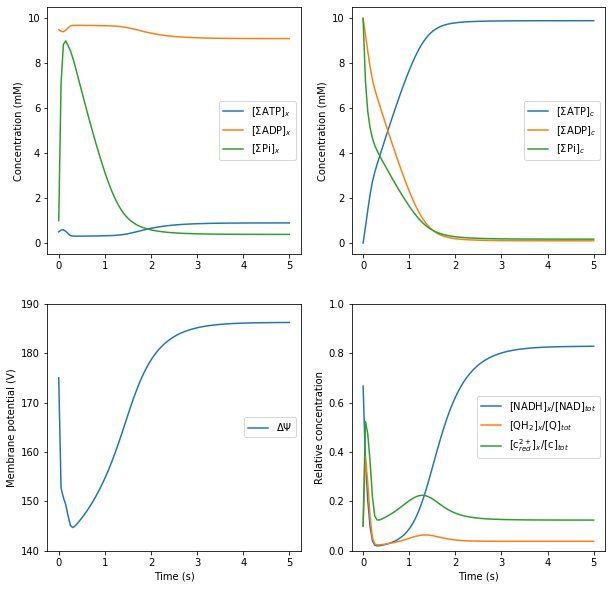

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

###### Constants defining metabolite pools ######
# Volume fractions and water space fractions
V_c = 0.6601       # cytosol volume fraction       # L cyto (L cell)**(-1)
V_m = 0.2882       # mitochondrial volume fraction # L mito (L cell)**(-1)
V_m2c = V_m / V_c  # mito to cyto volume ratio     # L mito (L cuvette)**(-1)
W_c = 0.8425      # cytosol water space           # L cyto water (L cyto)**(-1)
W_m = 0.7238       # mitochondrial water space     # L mito water (L mito)**(-1)
W_x = 0.9*W_m      # matrix water space            # L matrix water (L mito)**(-1)
W_i = 0.1*W_m      # intermembrane water space     # L IM water (L mito)**(-1)

# Total pool concentrations
NAD_tot = 2.97e-3  # NAD+ and NADH conc            # mol (L matrix water)**(-1)
Q_tot   = 1.35e-3  # Q and QH2 conc                # mol (L matrix water)**(-1)
c_tot   = 2.7e-3   # cytochrome c ox and red conc  # mol (L IM water)**(-1)

# Membrane capacitance
Cm = 3.1e-3

###### Set fixed pH, cation concentrations, and O2 partial pressure ######
# pH
pH_x = 7.40
pH_c = 7.20

# K+ concentrations
K_x  = 100e-3      # mol (L matrix water)**(-1)
K_c  = 140e-3      # mol (L cyto water)**(-1)

# Mg2+ concentrations
Mg_x = 1.0e-3        # mol (L matrix water)**(-1)
Mg_c = 1.0e-3        # mol (L cyto water)**(-1)

# Oxygen partial pressure
PO2 = 25 # mmHg

###### Parameter vector ###### 
X_DH  = 0.1732
X_C1  = 1.0e4
X_C3  = 1.0e6
X_C4  = 0.0125
X_F   = 1.0e3
E_ANT = 0.325
E_PiC = 5.0e6
X_H   = 1.0e3
X_AtC = 0

activity_array = np.array([X_DH, X_C1, X_C3, X_C4, X_F, E_ANT, E_PiC, X_H, X_AtC])

###### Initial Conditions ######
# Membrane Potential
DPsi_0 = 175/1000      # V

# Matrix species
sumATP_x_0 = 0.5e-3         # mol (L matrix water)**(-1)
sumADP_x_0 = 9.5e-3         # mol (L matrix water)**(-1)
sumPi_x_0  = 1.0e-3         # mol (L matrix water)**(-1)
NADH_x_0   = 2/3 * NAD_tot  # mol (L matrix water)**(-1)
QH2_x_0    = 0.1 * Q_tot    # mol (L matrix water)**(-1)

# IMS species
cred_i_0 = 0.1 * c_tot # mol (L IMS water)**(-1)

# Cytosolic species
sumATP_c_0 = 0       # mol (L cyto water)**(-1)
sumADP_c_0 = 10e-3   # mol (L cyto water)**(-1)
sumPi_c_0  = 10e-3   # mol (L cyto water)**(-1)

X_0 = np.array([DPsi_0, sumATP_x_0, sumADP_x_0, sumPi_x_0, NADH_x_0, QH2_x_0, cred_i_0, sumATP_c_0, sumADP_c_0, sumPi_c_0])

def dXdt(t, X, activity_array, solve_ode):
    # Unpack variables 
    DPsi, sumATP_x,sumADP_x, sumPi_x, NADH_x, QH2_x, cred_i, sumATP_c, sumADP_c, sumPi_c = X
    X_DH, X_C1, X_C3, X_C4, X_F, E_ANT, E_PiC, X_H, X_AtC = activity_array

    # Hydrogen ion concentration
    H_x = 10**(-pH_x) # mol (L matrix water)**(-1)
    H_c = 10**(-pH_c) # mol (L cuvette water)**(-1)

    # Oxygen concentration
    a_3  = 1.74e-6   # oxygen solubility in cuvette   # mol (L matrix water * mmHg)**(-1)
    O2_x = a_3*PO2   # mol (L matrix water)**(-1)

    # Thermochemical constants
    R = 8.314          # J (mol K)**(-1)
    T = 37 + 273.15    # K
    F = 96485          # C mol**(-1)
    
    # Proton motive force parameters (dimensionless)
    n_F  = 8/3
    n_C1 = 4
    n_C3 = 2
    n_C4 = 4
    
    # Dissociation constants
    K_MgATP = 10**(-3.88)
    K_HATP  = 10**(-6.33)
    K_KATP  = 10**(-1.02)
    K_MgADP = 10**(-3.00)
    K_HADP  = 10**(-6.26)
    K_KADP  = 10**(-0.89)
    K_MgPi  = 10**(-1.66)
    K_HPi   = 10**(-6.62)
    K_KPi   = 10**(-0.42)

    # Other concentrations computed from the state variables:
    NAD_x = NAD_tot - NADH_x  ## mol (L matrix water)**(-1)
    Q_x   = Q_tot - QH2_x     ## mol (L matrix water)**(-1)
    cox_i = c_tot - cred_i    ## mol (L matrix water)**(-1)

    ## Binding polynomials
    # Matrix species # mol (L mito water)**(-1)
    PATP_x = 1 + H_x/K_HATP + Mg_x/K_MgATP + K_x/K_KATP
    PADP_x = 1 + H_x/K_HADP + Mg_x/K_MgADP + K_x/K_KADP
    PPi_x  = 1 + H_x/K_HPi  + Mg_x/K_MgPi  + K_x/K_KPi
    
    # Cytosol species # mol (L cuvette water)**(-1)
    PATP_c = 1 + H_c/K_HATP + Mg_c/K_MgATP + K_c/K_KATP
    PADP_c = 1 + H_c/K_HADP + Mg_c/K_MgADP + K_c/K_KADP
    PPi_c  = 1 + H_c/K_HPi  + Mg_c/K_MgPi  + K_c/K_KPi
    
    ## Unbound species
    # Matrix species
    ATP_x = sumATP_x / PATP_x # [ATP4-]_x
    ADP_x = sumADP_x / PADP_x # [ADP3-]_x
    Pi_x  = sumPi_x  / PPi_x  # [HPO42-]_x
    
    # Cytosolic species 
    ATP_c = sumATP_c / PATP_c # [ATP4-]_c
    ADP_c = sumADP_c / PADP_c # [ADP3-]_c
    Pi_c  = sumPi_c  / PPi_c  # [HPO42-]_c
    
    ###### NADH Dehydrogenase ######

    # Constants
    r      = 6.8385
    k_Pi1  = 4.659e-4    # mol (L matrix water)**(-1)
    k_Pi2  = 6.578e-4    # mol (L matrix water)**(-1)
    
    # Flux
    J_DH = X_DH * (r * NAD_x - NADH_x) * ((1 + sumPi_x / k_Pi1) / (1+sumPi_x / k_Pi2))

    ###### Complex I ######
    # NADH_x + Q_x + 5H+_x <-> NAD+_x + QH2_x + 4H+_i + 4DPsi
    
    # Gibbs energy (J mol**(-1))
    DrGo_C1 = -109680 
    DrGapp_C1 = DrGo_C1 - R * T * np.log(H_x) 
    
    # Apparent equilibrium constant 
    Kapp_C1   = np.exp( -(DrGapp_C1 + n_C1 * F * DPsi) / (R * T)) * ((H_x / H_c)**n_C1)
    
    # Flux (mol (s * L mito)**(-1))
    J_C1 = X_C1 * (Kapp_C1 * NADH_x * Q_x - NAD_x * QH2_x)
    
    ###### Complex III ######
    # QH2_x + 2cuvetteC(ox)3+_i + 2H+_x <-> Q_x + 2cuvetteC(red)2+_i + 4H+_i + 2DPsi
    
    # Gibbs energy (J mol**(-1))
    DrGo_C3 = 46690 
    DrGapp_C3 = DrGo_C3 + 2 * R * T * np.log(H_c) 
    
    # Apparent equilibrium constant 
    Kapp_C3   = np.exp(-(DrGapp_C3 + n_C3 * F * DPsi) / (R * T)) * (H_x / H_c)**n_C3 
    
    # Flux (mol (s * L mito)**(-1))
    J_C3 = X_C3 * (Kapp_C3 * cox_i**2 * QH2_x - cred_i**2 * Q_x)

    ###### Complex IV ######
    # 2 cytoC(red)2+_i + 0.5O2_x + 4H+_x <-> cytoC(ox)3+_x + H2O_x + 2H+_i +2DPsi
    
    # Constant
    k_O2 = 1.2e-4      # mol (L matrix water)**(-1)
    
    # Gibbs energy (J mol**(-1))
    DrGo_C4 = -202160  # J mol**(-1)
    DrGapp_C4 = DrGo_C4 - 2 * R * T * np.log(H_c)
    
    # Apparent equilibrium constant 
    Kapp_C4   = np.exp(-(DrGapp_C4 + n_C4 * F * DPsi) / (R * T)) * (H_x / H_c)**n_C4
    
    # Flux (mol (s * L mito)**(-1))
    J_C4 = X_C4 *(Kapp_C4**0.5 * cred_i * O2_x**0.25 - cox_i) * (1 / (1 + k_O2 / O2_x))

    ###### F1F0-ATPase ######
    # ADP3-_x + HPO42-_x + H+_x + n_A*H+_i <-> ATP4- + H2O + n_A*H+_x
    
    # Gibbs energy (J mol**(-1))
    DrGo_F = 4990 
    DrGapp_F = DrGo_F + R * T * np.log( H_x * PATP_x / (PADP_x * PPi_x))
    
    # Apparent equilibrium constant
    Kapp_F   = np.exp( (DrGapp_F + n_F * F * DPsi ) / (R * T)) * (H_c / H_x)**n_F
    
    # Flux (mol (s * L mito)**(-1))
    J_F = X_F * (Kapp_F * sumADP_x * sumPi_x - sumATP_x)
    
    ###### ANT ######
    # ATP4-_x + ADP3-_i <-> ATP4-_i + ADP3-_x
    
    # Constants 
    del_D   = 0.0167
    del_T   = 0.0699
    k2o_ANT = 9.54/60      # s**(-1)
    k3o_ANT = 30.05/60     # s**(-1)
    K0o_D   = 38.89e-6     # mol (L cuvette water)**(-1)
    K0o_T   = 56.05e-6     # mol (L cuvette water)**(-1)
    A       = +0.2829
    B       = -0.2086
    C       = +0.2372
    
    phi = F * DPsi / (R * T)
    
    # Reaction rates
    k2_ANT = k2o_ANT * np.exp((A*(-3) + B*(-4) + C)*phi)
    k3_ANT = k3o_ANT * np.exp((A*(-4) + B*(-3) + C)*phi)
    
    # Dissociation constants
    K0_D = K0o_D * np.exp(3*del_D*phi)
    K0_T = K0o_T * np.exp(4*del_T*phi)
    
    q     = k3_ANT * K0_D * np.exp(phi) / (k2_ANT * K0_T)
    term1 = k2_ANT * ATP_x * ADP_c * q / K0_D
    term2 = k3_ANT * ADP_x * ATP_c / K0_T
    num   = term1 - term2
    den   = (1 + ATP_c/K0_T + ADP_c/K0_D) * (ADP_x + ATP_x * q)
    
    # Flux (mol (s * L mito)**(-1))
    J_ANT = E_ANT * num / den
    
    ###### H+-PI2 cotransporter ######
    # H2PO42-_x + H+_x = H2PO42-_c + H+_c
    
    # Constant
    k_PiC = 1.61e-3  # mol (L cuvette)**(-1)
    
    # H2P04- species
    HPi_c = Pi_c * (H_c / K_HPi)
    HPi_x = Pi_x * (H_x / K_HPi)
    
    # Flux (mol (s * L mito)**(-1))
    J_PiC = E_PiC * (H_c * HPi_c - H_x * HPi_x) / (k_PiC + HPi_c)

    ###### H+ leak ######
    
    # Flux (mol (s * L mito)**(-1))
    J_H = X_H * (H_c * np.exp(phi/2) - H_x * np.exp(-phi/2))
    
    ###### ATPase ######
    # ATP4- + H2O = ADP3- + PI2- + H+
    
    #Flux (mol (s * L cyto)**(-1))
    J_AtC = X_AtC / V_c

    ###### Differential equations (equation 23) ######
    # Membrane potential
    dDPsi = (n_C1 * J_C1 + n_C3 * J_C3 + n_C4 * J_C4 - n_F * J_F - J_ANT - J_H) / Cm

    # Matrix species
    dATP_x  = (J_F  - J_ANT) / W_x
    dADP_x  = (-J_F + J_ANT) / W_x
    dPi_x   = (-J_F + J_PiC) / W_x
    dNADH_x = (J_DH  - J_C1)  / W_x
    dQH2_x  = (J_C1  - J_C3)  / W_x
    
    # IMS species
    dcred_i = 2 * (J_C3 - J_C4) / W_i
    
    # Buffer species
    dATP_c = ( V_m2c * J_ANT - J_AtC ) / W_c
    dADP_c = (-V_m2c * J_ANT + J_AtC ) / W_c
    dPi_c  = (-V_m2c * J_PiC + J_AtC) / W_c

    dX = [dDPsi, dATP_x, dADP_x, dPi_x, dNADH_x, dQH2_x, dcred_i, dATP_c, dADP_c, dPi_c]
    
    # Need to be able to calculate fluxes after the fact 
    if solve_ode == 1:
        return dX
    else:
        J = np.array([PATP_x, PADP_x, PPi_x, PATP_c, PADP_c, PPi_c, J_DH, J_C1, J_C3, J_C4, J_F, J_ANT, J_PiC, DrGapp_F])
        return dX, J
   
    
# Time vector 
t = np.linspace(0,5,100)
    
# Solve ODE
results = solve_ivp(dXdt, [0, 5], X_0, method = 'Radau', t_eval=t, args=(activity_array,1))
DPsi, sumATP_x,sumADP_x, sumPi_x, NADH_x, QH2_x, cred_i, sumATP_c, sumADP_c, sumPi_c = results.y

# Plot figures 
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(t, sumATP_x*1000, label = '[$\Sigma$ATP]$_x$')
ax[0,0].plot(t, sumADP_x*1000, label = '[$\Sigma$ADP]$_x$')
ax[0,0].plot(t, sumPi_x*1000, label = '[$\Sigma$Pi]$_x$')
ax[0,0].legend(loc="right")
ax[0,0].set_ylabel('Concentration (mM)')
ax[0,0].set_ylim((-.5,10.5))

ax[0,1].plot(t, sumATP_c*1000, label = '[$\Sigma$ATP]$_c$')
ax[0,1].plot(t, sumADP_c*1000, label = '[$\Sigma$ADP]$_c$')
ax[0,1].plot(t, sumPi_c*1000, label = '[$\Sigma$Pi]$_c$')
ax[0,1].legend(loc="right")
ax[0,1].set_ylabel('Concentration (mM)')
ax[0,1].set_ylim((-.5,10.5))

ax[1,0].plot(t, DPsi*1000, label = '$\Delta\Psi$')
ax[1,0].set_ylim((140, 190))
ax[1,0].legend(loc="right")
ax[1,0].set_xlabel('Time (s)')
ax[1,0].set_ylabel('Membrane potential (V)')

ax[1,1].plot(t, NADH_x/NAD_tot, label = '[NADH]$_x$/[NAD]$_{tot}$')
ax[1,1].plot(t, QH2_x/Q_tot, label = '[QH$_2$]$_x$/[Q]$_{tot}$')
ax[1,1].plot(t, cred_i/c_tot, label = '[c$^{2+}_{red}$]$_x$/[c]$_{tot}$')
ax[1,1].legend(loc="right")
ax[1,1].set_xlabel('Time (s)')
ax[1,1].set_ylabel('Relative concentration')
ax[1,1].set_ylim((0, 1))

plt.show()


The above simulations reach a final steady state where the phophate metabolite concentrations are $[\text{Pi}]_c = 0.2 \ \text{mM}$ and $[\text{Pi}]_x = 0.4 \ \text{mM}$, and the membrane potential is $186 \ \text{mV}$. This state represents a *resting* energetic state with no ATP hydrolyis in the cytosol. The Gibbs energy of ATP hydrolysis associated with this predicted state is $\Delta G_{\rm ATP} = \text{-}51 \ \text{kJ mol}^{-1}$, as calculated below.

*Dan - Did you want to include the ratios for NAD, Q, and c?* 

In [5]:
### Find Gibbs energy of ATP hydrolysis ### 
dX, J_new = dXdt(t[-1],results.y[:,-1],activity_array,0)
DrGapp_F  = J_new[-1]

DrG_ATP = DrGapp_F + 8.314 * 310.15 * np.log((sumADP_x[-1] * sumPi_x[-1] / sumATP_x[-1]))

print('Gibbs energy of ATP hydrolysis (kJ mol^(-1))')
print(DrG_ATP/1000)

Gibbs energy of ATP hydrolysis (kJ mol^(-1))
-51.07498014437706
